<a href="https://colab.research.google.com/github/Chirag314/Autompg-ensemble-model/blob/main/Autompg_Ensemble_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [13]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter03/autompg.csv'
df_autodata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_autodata.head(5))

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model year  origin                    carname  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [15]:
#Check the shape of data
df_autodata.shape

(398, 9)

In [16]:
# Check for missing values.
df_autodata.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
carname         0
dtype: int64

#####Here, we can see that there are missing values in data. Impute missing values with median.Now separate predictor and response variable into two different dataframes

In [17]:
df_autodata['horsepower'].fillna(df_autodata['horsepower'].median(),inplace=True)
#Drop 'carname' variable
df_autodata.drop(['carname'],axis=1,inplace=True)



In [18]:
# Create feature and response variables

X=df_autodata.iloc[:,1:8]
Y=df_autodata.iloc[:,0]
X=np.array(X)
Y=np.array(Y)


#####We'll split the dataset into K consecutive folds (without shuffling by default) with K=10:

In [22]:
kfoldcv = KFold(n_splits=10)
kf_ytests = []
kf_predictedvalues = []
mean_mse = 0.0

for train_index, test_index in kfoldcv.split(X):
    X_train, X_test = X[train_index], X[test_index] 
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    model = LinearRegression()
    model.fit(X_train, Y_train) 
    Y_pred = model.predict(X_test)
        
    # there is only one y-test and y-pred per iteration over the kfoldcv.split, 
    # so we append them to the respective lists.
        
    kf_ytests += list(Y_test)
    kf_predictedvalues += list(Y_pred)
    mse = mean_squared_error(kf_ytests, kf_predictedvalues)
    r2score = r2_score(kf_ytests, kf_predictedvalues)
    print("R^2: {:.2f}, MSE: {:.2f}".format(r2score, mse))
    mean_mse += mse   

R^2: 0.68, MSE: 8.96
R^2: 0.73, MSE: 9.10
R^2: 0.69, MSE: 9.90
R^2: 0.72, MSE: 9.47
R^2: 0.75, MSE: 8.50
R^2: 0.77, MSE: 8.32
R^2: 0.75, MSE: 9.83
R^2: 0.77, MSE: 10.13
R^2: 0.78, MSE: 12.59
R^2: 0.79, MSE: 12.85


We can look at our coefficient of determination using r2_score() and the mean squared error using mse():

In [23]:
print("Average CV score :",mean_mse/10)

Average CV score : 9.96285298183744


Text(0, 0.5, 'Predicted mpg')

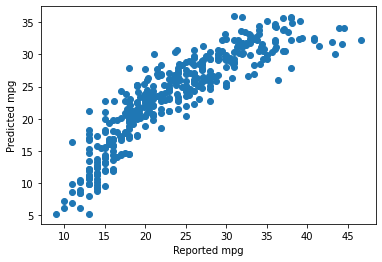

In [24]:
## Let us plot the model
plt.scatter(kf_ytests, kf_predictedvalues)
plt.xlabel('Reported mpg')
plt.ylabel('Predicted mpg')